In [2]:
import random
import numpy as np
from statistics import mean
from random import randrange
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class KNearestKneighbors():
    def __init__(self, k):
        self.k = k

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        distances = self.compute_distance(X_test)
        return self.predict_labels(distances)

    def compute_distance(self, X_test):
        distances = np.sqrt(np.sum(X_test**2, axis=1, keepdims=True) + np.sum(self.X_train**2, axis=1, keepdims=True).T - 2*np.dot(X_test, self.X_train.T))
        return distances
        
    def predict_labels(self, distances):
        n_test = distances.shape[0]
        y_pred = np.zeros(n_test)

        for i in range(n_test):
            y_index = np.argsort(distances[i, :])
            k_closests = self.y_train[y_index[:self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closests))
        return y_pred

In [4]:
def cross_validation_split(data, folds=5):
    k_sets = []
    data_copy = data
    fold_size = int(data.shape[0] / folds)
    for _ in range(folds):
        fold = []
        while len(fold) < fold_size:
            dummy = randrange(data.shape[0])
            fold.append(data_copy[dummy])
            np.delete(data_copy, dummy)
        k_sets.append(np.asarray(fold))
    return k_sets

In [5]:
def KfoldCV(dataset, fold=5, k=5):
    data = cross_validation_split(dataset, fold)
    result = []
    for i in range(fold):
        level = list(range(fold))
        level.pop(i)
        for j in level:
            if j == level[0]:
                cv = data[j]
            else:    
                cv=np.concatenate((cv, data[j]), axis=0)
        KNN = KNearestKneighbors(k=k)
        KNN.train(cv[:,1:], cv[:,0])
        y_pred = KNN.predict(data[i][:,1:])
        acc = (y_pred == data[i][:,0]).sum()
        result.append(acc/len(y_pred))
    return result

In [6]:
train_small = np.genfromtxt(
        'datasets/MNIST_train_small.csv', delimiter=',')
test_small = np.genfromtxt('datasets/MNIST_test_small.csv', delimiter=',')

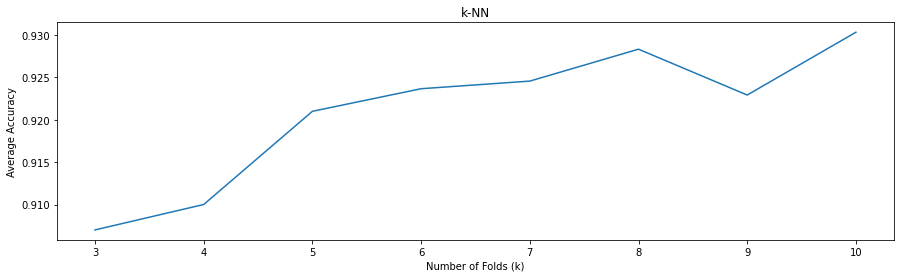

In [8]:
random.seed(1)
# plot the change in the average accuracy according to k 
knn = []
for f in range(3, 11):
    # k-fold cv from scratch for k-NN
    knn.append(mean(KfoldCV(train_small, f)))
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xlabel("Number of Folds (k)")
plt.ylabel("Average Accuracy")
plt.plot(range(3, 11), knn);